In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def get_MAE(y_pred, y_real):
    total = 0
    for y_pred_i, y_real_i in zip(y_pred, y_real):
        total += abs(y_pred_i - y_real_i) 
    return total/len(y_pred)

In [3]:
def get_MAE_plot(scenario, y_pred, y_real):
    total = []
    for y_pred_i, y_real_i in zip(y_pred, y_real):
        MAE_values = abs(y_pred_i - y_real_i) 
        total.append(MAE_values)
        
    if scenario == 'BD' or scenario == 'HE' or scenario == 'ME':
        sns.boxplot([array[0] for array in total], showmeans=True, meanprops={'markersize':'8'})
        plt.title('Turnover(a)')
        plt.show()
        sns.boxplot([array[1] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('Diversification(r)')
        plt.show()
        sns.boxplot([array[2] for array in total], showmeans=True, meanprops={'markersize':'8'})
        plt.title('lambda')    
        plt.show()
        sns.boxplot([array[3] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('mu')    
        plt.show()
        
        if scenario == 'ME':
            sns.boxplot([array[2] for array in total], showmeans=True, meanprops={'markersize':'8'})
            plt.title('time')    
            plt.show()
            sns.boxplot([array[3] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
            plt.title('rho')    
            plt.show()
            
    elif scenario == 'SR' or scenario == 'WW':
        sns.boxplot([array[0] for array in total], showmeans=True, meanprops={'markersize':'8'})
        plt.title('a0')
        plt.show()
        sns.boxplot([array[1] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('a1')
        plt.show()
        sns.boxplot([array[2] for array in total], showmeans=True, meanprops={'markersize':'8'})
        plt.title('r0')    
        plt.show()
        sns.boxplot([array[3] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('r1')    
        plt.show()
        sns.boxplot([array[4] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('time')    
        plt.show()
        sns.boxplot([array[5] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('lambda0')    
        plt.show()
        sns.boxplot([array[6] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('lambda1')    
        plt.show()
        sns.boxplot([array[7] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('mu0')    
        plt.show()
        sns.boxplot([array[8] for array in total], showmeans=True, meanprops={'markersize':'8'}) 
        plt.title('mu1')    
        plt.show()

In [4]:
def extend_y_values(y_list):
    mu = (y_list[:, 0]*y_list[:, 1])/(1-y_list[:, 0])
    lamb = y_list[:, 1] + mu
    y_list = np.column_stack((y_list, lamb, mu))       
    return y_list

* Parameter order
    * a, r, lambda, mu 

In [ ]:
def extend_y_values_time(y_list):
    mu0 = (y_list[:, 0]*y_list[:, 2])/(1-y_list[:, 0])
    lamb0 = y_list[:, 2] + mu0
    mu1 = (y_list[:, 1]*y_list[:, 3])/(1-y_list[:, 1])
    lamb1 = y_list[:, 3] + mu1
    y_list = np.column_stack((y_list, lamb0, lamb1, mu0, mu1))       
    return y_list

* Parameters order
    * a0, a1, r0, r1, time, lambda0, lambda1, mu0, mu1  

# Errors

In [ ]:
scenario = 'BD'

### get y_test

In [5]:
df_test = pd.read_csv("C:/Users/7pabl/trabajo/TreePar/87/", scenario, "_sim_87_TreePar.csv", sep = "|")

if scenario == 'BD' or scenario == 'HE' or scenario == 'ME':
    columns = df_test[['a0', 'r0']].values
elif scenario == 'SR' or scenario == 'WW':
    columns = df_test[['a0', 'a1', 'r0', 'r1', "time"]].values
    
y_test = np.array(columns.tolist())
y_test = extend_y_values(y_test)
y_test.shape

(100, 4)

### get y_pred 

In [6]:
df_pred = pd.read_excel("constant_87_", scenario, ".xlsx")
if scenario == 'BD' or scenario == 'HE' or scenario == 'ME':
    columns = df_pred[['elements_1', 'elements_2']].values
elif scenario == 'SR' or scenario == 'WW':
    columns = df_pred[['elements_1', 'elements_2', "elements_3", "elements_4", "elements_5"]].values

y_pred = np.array(columns.tolist())
y_pred = extend_y_values(y_pred)
y_pred.shape

C:\Users\7pabl\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(100, 4)

### MAEs 

In [7]:
MAE = get_MAE(y_pred, y_test)
print(MAE)
if scenario == 'BD' or scenario == 'HE' or scenario == 'ME':
    row = ['a', 'r', 'lambda', 'mu']
elif scenario == 'SR' or scenario == 'WW':
    row = ['a0', 'a1', 'r0', 'r1', 'time', 'lambda0', 'lambda1', 'mu0', 'mu1']
    
col = ['MAE']
df = pd.DataFrame(MAE, columns=col, index= row)
print(scenario)
df

[0.17053292 0.38800144 0.46391672 0.63675651]
BD


,MAE
a,0.170533
r,0.388001
lambda,0.463917
mu,0.636757


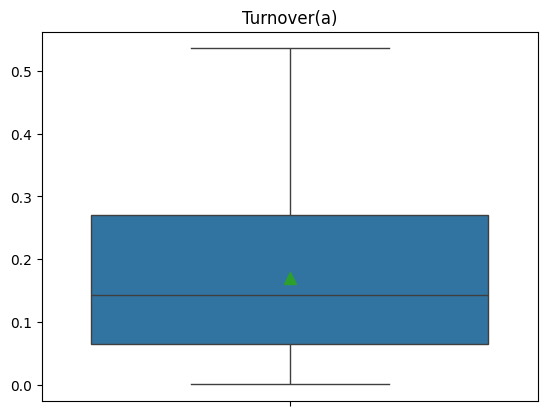

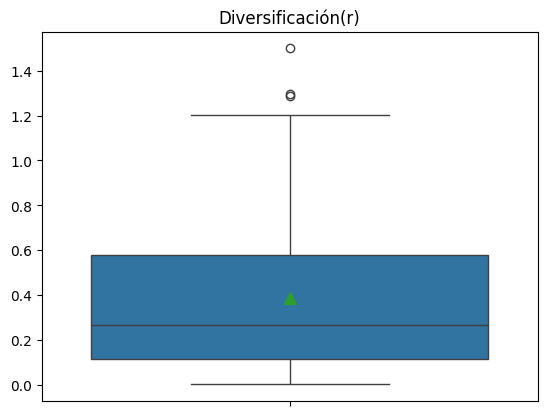

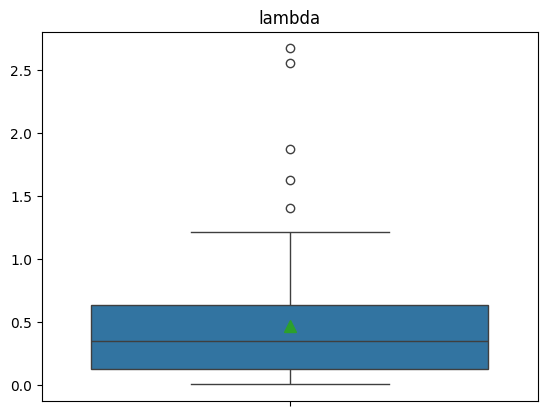

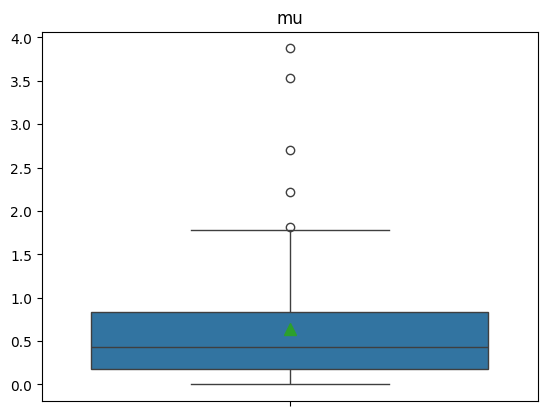

(<Axes: title={'center': 'Turnover(a)'}>,
 <Axes: title={'center': 'Diversificación(r)'}>,
 <Axes: title={'center': 'lambda'}>,
 <Axes: title={'center': 'mu'}>)

In [8]:
get_MAE_plot(scenario, y_pred, y_test)

### Classification

In [73]:
df_class = pd.read_excel("total_87_", scenario, ".xlsx")
one_shift = df_class["AICs_one_shift"]
bd = df_class["AICs_BD"]
me = df_class["AICs_ME"]

C:\Users\7pabl\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [74]:
df_constant = pd.read_excel("constant_87_", scenario, ".xlsx")
df_one_shift = pd.read_excel("oneshift_87_", scenario, ".xlsx")

C:\Users\7pabl\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\7pabl\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [75]:
class_as_bd = 0
class_as_sr = 0
class_as_me = 0 
class_as_he = 0
class_as_ww = 0 
class_as_unknow = 0

In [76]:
bd_index = []
one_shift_index = []

In [81]:
for i in range(len(one_shift)):
    if bd[i] < one_shift[i] and bd[i] < me[i]:
        bd_index.append(i)
    elif one_shift[i] < bd[i] and one_shift[i] < me[i]:
        one_shift_index.append(i)
    elif me[i] < bd[i] and me[i] < one_shift[i]:
        class_as_me += 1 
    else:
        print("algo no está bien")

In [78]:
for i in bd_index:
    if df_constant["elements_1"][i] > 0.8:
        class_as_he += 1     
    else:
        class_as_bd += 1

In [79]:
for i in one_shift_index:
    if df_one_shift["elements_3"][i] > 0 and df_one_shift["elements_4"][i] > 0:
        class_as_sr += 1
    elif df_one_shift["elements_3"][i] < 0 and df_one_shift["elements_4"][i] > 0:
        class_as_ww += 1
    else: 
        class_as_unknow += 1

In [80]:
print(f"{class_as_bd} trees classified as BD")
print(f"{class_as_he} trees classified as HE")
print(f"{class_as_me} trees classified as ME")
print(f"{class_as_sr} trees classified as SR")
print(f"{class_as_ww} trees classified as WW")
print(f"{class_as_unknow} trees classified as Unknow")

72 filogenias clasificadas como BD
0 filogenias clasificadas como HE
14 filogenias clasificadas como ME
7 filogenias clasificadas como SR
1 filogenias clasificadas como WW
6 filogenias clasificadas como Unknow
